<a href="https://colab.research.google.com/github/chabpre/dataprovisual/blob/main/Quiz_12_ExamReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [2]:
%%bigquery --project temporal-nebula-338801
SELECT *
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
LIMIT 10

,incident_number,date_of_call,cal_year,time_of_call,hour_of_call,timestamp_of_call,incident_group,stop_code_description,special_service_type,property_category,property_type,address_qualifier,postcode_full,postcode_district,borough_code,borough_name,proper_case,ward_code,ward_name,ward_name_new,easting_m,northing_m,easting_rounded,northing_rounded,frs,incident_station_ground,first_pump_arriving_attendance_time,first_pump_arriving_deployed_from_station,second_pump_arriving_attendance_time,second_pump_arriving_deployed_from_station,num_stations_with_pumps_attending,num_pumps_attending
0,000320-01012017,2017-01-01,2017,15:30:22,15,2017-01-01 15:30:22+00:00,False Alarm,AFA,None,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Within same building,None,IG9,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,541450,194050,OverTheBorder,OverTheBorder,None,None,None,None,2,2
1,003727-09012017,2017-01-09,2017,10:41:54,10,2017-01-09 10:41:54+00:00,False Alarm,AFA,None,Dwelling,House - single occupancy,Correct incident location,None,IG7,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,543650,192950,OverTheBorder,OverTheBorder,None,None,None,None,2,2
2,003762-09012017,2017-01-09,2017,12:28:39,12,2017-01-09 12:28:39+00:00,False Alarm,AFA,None,Dwelling,House - single occupancy,Correct incident location,None,IG7,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,543650,192950,OverTheBorder,OverTheBorder,None,None,None,None,2,2
3,006403-16012017,2017-01-16,2017,04:02:14,4,2017-01-16 04:02:14+00:00,False Alarm,AFA,None,Dwelling,Purpose Built Flats/Maisonettes - Up to 3 stor...,Correct incident location,None,IG7,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,544350,192250,OverTheBorder,OverTheBorder,None,None,None,None,2,2
4,010947-26012017,2017-01-26,2017,11:14:03,11,2017-01-26 11:14:03+00:00,False Alarm,AFA,None,Dwelling,House - single occupancy,Correct incident location,None,IG10,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,542050,196450,OverTheBorder,OverTheBorder,None,None,None,None,1,1
5,014169-03022017,2017-02-03,2017,04:58:02,4,2017-02-03 04:58:02+00:00,False Alarm,AFA,None,Dwelling,Converted Flat/Maisonettes - 3 or more storeys,Correct incident location,None,TN14,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,548750,157750,OverTheBorder,OverTheBorder,None,None,None,None,3,5
6,016263-08022017,2017-02-08,2017,09:47:05,9,2017-02-08 09:47:05+00:00,False Alarm,AFA,None,Dwelling,House - single occupancy,Correct incident location,None,IG7,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,544150,192550,OverTheBorder,OverTheBorder,None,None,None,None,2,2
7,016865-09022017,2017-02-09,2017,18:40:43,18,2017-02-09 18:40:43+00:00,False Alarm,AFA,None,Non Residential,Warehouse,Correct incident location,UB9 5HJ,UB9,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,504201.0,188280.0,504250,188250,OverTheBorder,OverTheBorder,None,None,None,None,1,1
8,017092-10022017,2017-02-10,2017,10:07:53,10,2017-02-10 10:07:53+00:00,False Alarm,AFA,None,Non Residential,Factory,Correct incident location,UB9 5HJ,UB9,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,504287.0,188271.0,504250,188250,OverTheBorder,OverTheBorder,None,None,None,None,1,1
9,024609-27022017,2017-02-27,2017,09:34:33,9,2017-02-27 09:34:33+00:00,False Alarm,AFA,None,Dwelling,Converted Flat/Maisonette - Up to 2 storeys,Correct incident location,None,CR3,E00000000,NOT GEO-CODED,Not geo-coded,E00000000,Not geo-coded,Not geo-coded,NaN,NaN,537650,155050,OverTheBorder,OverTheBorder,None,None,None,None,1,1


In [6]:
%%bigquery --project temporal-nebula-338801
SELECT 
  COUNT(*) as Total_Entries
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`

,Total_Entries
0,32247


In [5]:
%%bigquery --project temporal-nebula-338801
SELECT COUNT(*) as Number_of_False_Alarms
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
WHERE incident_group = "False Alarm" AND (hour_of_call >= 22 OR hour_of_call<=4)

,Number_of_False_Alarms
0,2825


In [7]:
%%bigquery --project temporal-nebula-338801
SELECT INCIDENT_GROUP, AVG(num_pumps_attending) as num_pumps_avg
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
GROUP BY incident_group

,INCIDENT_GROUP,num_pumps_avg
0,False Alarm,1.725776
1,Fire,1.633012
2,Special Service,1.177192


In [8]:
%%bigquery --project temporal-nebula-338801
SELECT MAX(num_pumps_attending) as num_pumps_max, property_category 
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
GROUP BY property_category

,num_pumps_max,property_category
0,7,Dwelling
1,7,Non Residential
2,5,Other Residential
3,3,Boat
4,5,Outdoor Structure
5,4,Rail Vehicle
6,6,Outdoor
7,6,Road Vehicle
8,4,Aircraft


In [9]:
import requests
import pandas as pd
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/Oklahoma')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")

df = pd.read_html(str(tables))[0]
df

,City,Unnamed: 1,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Oklahoma City,Avg. high,50 °F(10 °C),55 °F(13 °C),63 °F(17 °C),73 °F(23 °C),80 °F(27 °C),88 °F(31 °C),94 °F(34 °C),93 °F(34 °C),85 °F(29 °C),73 °F(23 °C),62 °F(17 °C),51 °F(11 °C)
1,Oklahoma City,Avg. low,29 °F(−2 °C),33 °F(1 °C),41 °F(5 °C),50 °F(10 °C),60 °F(16 °C),68 °F(20 °C),72 °F(22 °C),71 °F(22 °C),63 °F(17 °C),52 °F(11 °C),40 °F(4 °C),31 °F(−1 °C)
2,Tulsa,Avg. high,48 °F(9 °C),53 °F(12 °C),62 °F(17 °C),72 °F(22 °C),79 °F(26 °C),88 °F(31 °C),93 °F(34 °C),93 °F(34 °C),84 °F(29 °C),73 °F(23 °C),61 °F(16 °C),49 °F(9 °C)
3,Tulsa,Avg. low,27 °F(−3 °C),31 °F(−1 °C),40 °F(4 °C),49 °F(9 °C),59 °F(15 °C),68 °F(20 °C),73 °F(23 °C),71 °F(22 °C),62 °F(17 °C),51 °F(11 °C),40 °F(4 °C),30 °F(−1 °C)
4,Lawton,Avg. high,50 °F(10 °C),56 °F(13 °C),65 °F(18 °C),73 °F(23 °C),82 °F(28 °C),90 °F(32 °C),96 °F(36 °C),95 °F(35 °C),86 °F(30 °C),76 °F(24 °C),62 °F(17 °C),52 °F(11 °C)
5,Lawton,Avg. low,26 °F(−3 °C),31 °F(−1 °C),40 °F(4 °C),49 °F(9 °C),59 °F(15 °C),68 °F(20 °C),73 °F(23 °C),71 °F(22 °C),63 °F(17 °C),51 °F(11 °C),39 °F(4 °C),30 °F(−1 °C)


In [12]:
df[df.City == "Oklahoma City"]

,City,Unnamed: 1,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,Oklahoma City,Avg. high,50 °F(10 °C),55 °F(13 °C),63 °F(17 °C),73 °F(23 °C),80 °F(27 °C),88 °F(31 °C),94 °F(34 °C),93 °F(34 °C),85 °F(29 °C),73 °F(23 °C),62 °F(17 °C),51 °F(11 °C)
1,Oklahoma City,Avg. low,29 °F(−2 °C),33 °F(1 °C),41 °F(5 °C),50 °F(10 °C),60 °F(16 °C),68 °F(20 °C),72 °F(22 °C),71 °F(22 °C),63 °F(17 °C),52 °F(11 °C),40 °F(4 °C),31 °F(−1 °C)


In [14]:
df = df.melt(id_vars = ['City','Unnamed: 1'],
                  value_vars = df.columns[2:],
                  var_name = 'month'
)

df.value = df.value.apply(lambda s: int(s[:2]))

df.columns = ['City','Low_High', 'Month','Temp_F']

df

,City,Low_High,Month,Temp_F
0,Oklahoma City,Avg. high,Jan,50
1,Oklahoma City,Avg. low,Jan,29
2,Tulsa,Avg. high,Jan,48
3,Tulsa,Avg. low,Jan,27
4,Lawton,Avg. high,Jan,50
...,...,...,...,...
67,Oklahoma City,Avg. low,Dec,31
68,Tulsa,Avg. high,Dec,49
69,Tulsa,Avg. low,Dec,30
70,Lawton,Avg. high,Dec,52


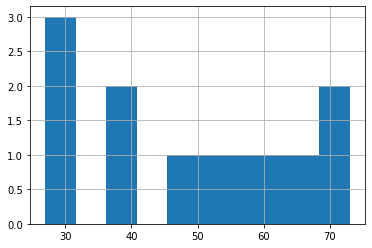

In [19]:
df.query('City == "Tulsa" and Low_High == "Avg. low"').Temp_F.hist()
